In [1]:
import re
import ast
import pandas as pd
from pathlib import Path

SRC_DIR = Path('/Volumes/external_drive')

In [2]:
df = pd.read_csv('datasets/image_high_res.csv')
df = df[df['tags_list'].notnull()]
df = df[df['categories'].notnull()]

In [3]:
df['models'] = df['models'].apply(ast.literal_eval)
df['categories'] = df['categories'].apply(ast.literal_eval)
df['tags_list'] = df['tags_list'].apply(ast.literal_eval)

<Axes: ylabel='Frequency'>

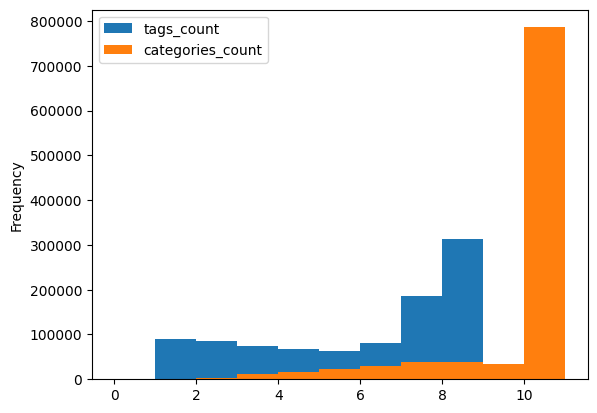

In [4]:
df['tags_count'] = df['tags_list'].apply(len)
df['categories_count'] = df['categories'].apply(len)

df['tags_count'].plot(kind='hist', bins=10, legend=True)
df['categories_count'].plot(kind='hist', bins=10, legend=True)

In [17]:
gn = 'amazing-blonde-doll-in-pantyhose-tillie-shows-her-nice-tits-on-the-sofa-40500918'
gallery = df[df.gallery_name == gn]
gallery.categories

842435    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842436    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842437    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842438    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842439    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842440    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842441    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842442    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842443    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842444    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842445    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842446    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842447    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842448    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842449    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842450    [Non Nude, Beautiful, Legs, Stockings, Babe, S...
842451    [Non Nude, Beautiful, Legs, St

In [ ]:
filtered = df[(df['categories_count'] > 9) & (df['tags_count'] > 6)]
filtered.shape

In [ ]:
aged_df = df[df['categories'].apply(lambda x: any(category in age_tags for category in x))]
looks_df = aged_df[aged_df['categories'].apply(lambda x: any(category in physical_look_tags for category in x))]
utility_df = looks_df[looks_df['categories'].apply(lambda x: any(category in utility_tags for category in x))]
negative_aged_df = utility_df[
    utility_df['categories'].apply(lambda x: all(category not in negative_tags for category in x))]
negative_aged_df = negative_aged_df.reset_index(drop=True)

In [ ]:
negative_aged_df.shape

In [ ]:
negative_aged_df.head()

In [ ]:
all_tags = sorted(list(set([item for sublist in negative_aged_df['categories'] for item in sublist])))


def clean_list(lst):
    lst = [re.sub(r'\s+', ' ', item) for item in lst]
    return list(set([item for item in lst if item != '']))


all_tags = clean_list(all_tags)
all_tags = sorted(list(clean_list(all_tags)))
all_tags

In [ ]:
len(all_tags)

In [ ]:
import random
from PIL import Image

random_image = random.randint(0, negative_aged_df.shape[0])
row = negative_aged_df.iloc[random_image]
path = SRC_DIR / row.category / row.gallery_name / row.filename
print(path)
image = Image.open(path)
image.show()